In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thu thập và tiền xử lý dữ liệu

In [64]:
df = pd.read_csv('diabetes.csv')

## Giải thích các trường thuộc tính

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dữ liệu này liên quan đến các bệnh nhân nữ từ 21 tuổi trở lên, thuộc di sản Pima Indian, với mục tiêu dự đoán nguy cơ tiểu đường

* Pregnancies (Số lần mang thai): Số lần bệnh nhân mang thai. Thuộc tính này có thể liên quan đến nguy cơ tiểu đường do thay đổi nội tiết khi mang thai.

* Glucose (Nồng độ glucose huyết tương): Đo nồng độ glucose trong máu sau 2 giờ thực hiện bài kiểm tra dung nạp glucose đường uống (mg/dL). Giá trị cao có thể là dấu hiệu của tiểu đường.

* BloodPressure (Huyết áp tâm trương): Huyết áp tâm trương (mm Hg), phản ánh áp lực máu khi tim nghỉ giữa các nhịp đập. Huyết áp cao thường liên quan đến nguy cơ tiểu đường và bệnh tim mạch.

* SkinThickness (Độ dày nếp gấp da vùng bắp tay sau): Đo độ dày lớp da ở vùng bắp tay sau (mm), phản ánh lượng mỡ dưới da. Giá trị cao có thể liên quan đến béo phì, một yếu tố nguy cơ của tiểu đường.

* Insulin (Insulin huyết thanh 2 giờ): Nồng độ insulin trong máu sau 2 giờ (mu U/ml). Giá trị này giúp đánh giá khả năng sản xuất insulin của cơ thể, có thể bất thường ở bệnh nhân tiểu đường.

* BMI (Chỉ số khối cơ thể): Tính bằng công thức trọng lượng (kg) / (chiều cao (m))^2. BMI cao (béo phì) là yếu tố nguy cơ chính của tiểu đường loại 2.

* DiabetesPedigreeFunction (Hàm phả hệ tiểu đường): Một chỉ số đo lường nguy cơ di truyền của tiểu đường dựa trên tiền sử gia đình. Giá trị cao cho thấy nguy cơ di truyền lớn hơn.

* Age (Tuổi): Tuổi của bệnh nhân (tính bằng năm). Tuổi cao thường làm tăng nguy cơ tiểu đường loại 2 do sự suy giảm chức năng cơ thể.

* Outcome (Kết quả): Biến phân loại (0 hoặc 1), trong đó 0 là không bị tiểu đường, 1 là có tiểu đường. Đây là biến mục tiêu để dự đoán.

## Kiểm tra kiểu dữ liệu (Numerical / Categorical)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Kiểm tra thông tin thống kê của dữ liệu

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Dữ liệu thống kê cho thấy:**
* Số lần mang thai (Pregnancies), thông tin di truyền tiểu đường (DiabetesPedigreeFunction) và tuổi (Age) nằm trong khoảng giá trị thực tế
* Một số trường thuộc tính khác (Glucose, BloodPressure, Insulin, BMI) bao gồm các giá trị 0, là các giá trị không thể xảy ra trên thực tế và cần được xử lý


## Kiểm tra cân bằng nhãn lớp

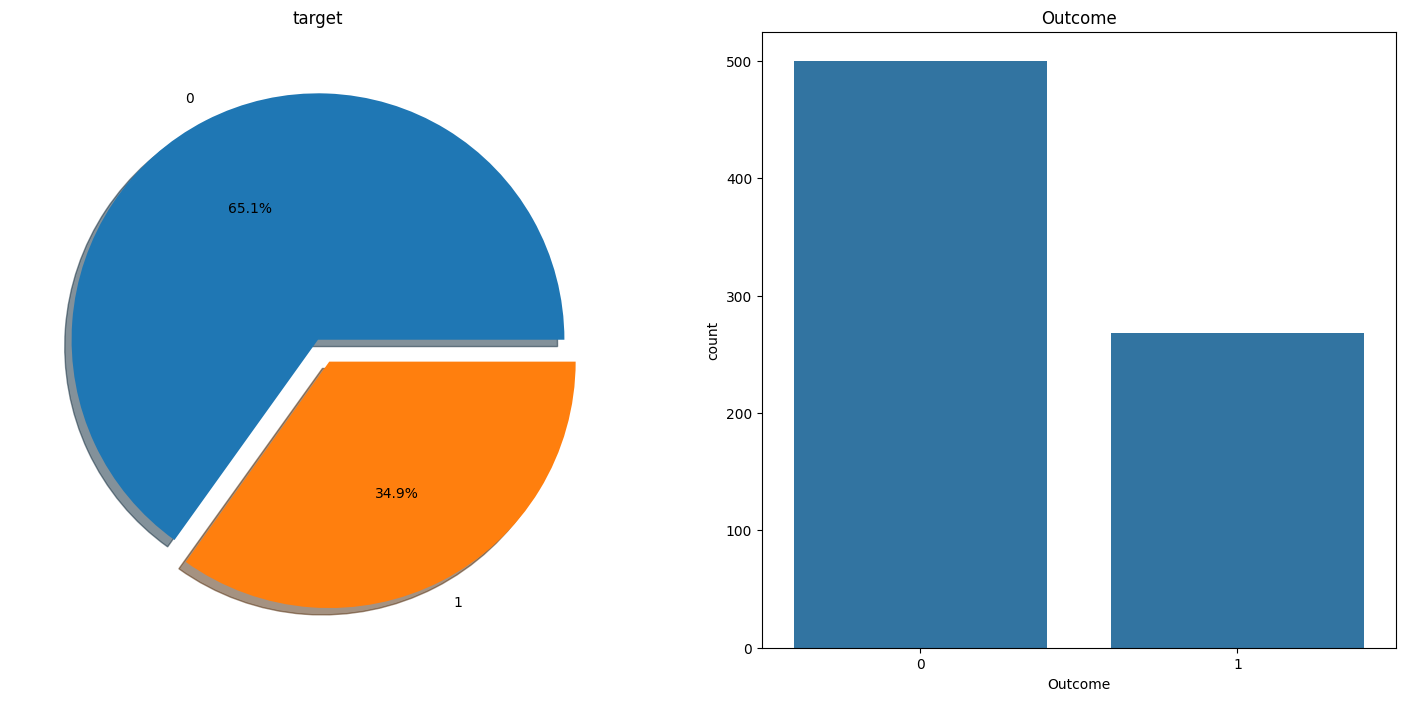

In [68]:
f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x= 'Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

Nhận thấy tỉ lệ nhãn lớp của tập dữ liệu bị mất cân bằng do đó cần thực hiện những phương pháp xử lý dữ liệu mất cân bằng

## Kiểm tra phân bố dữ liệu các trường

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

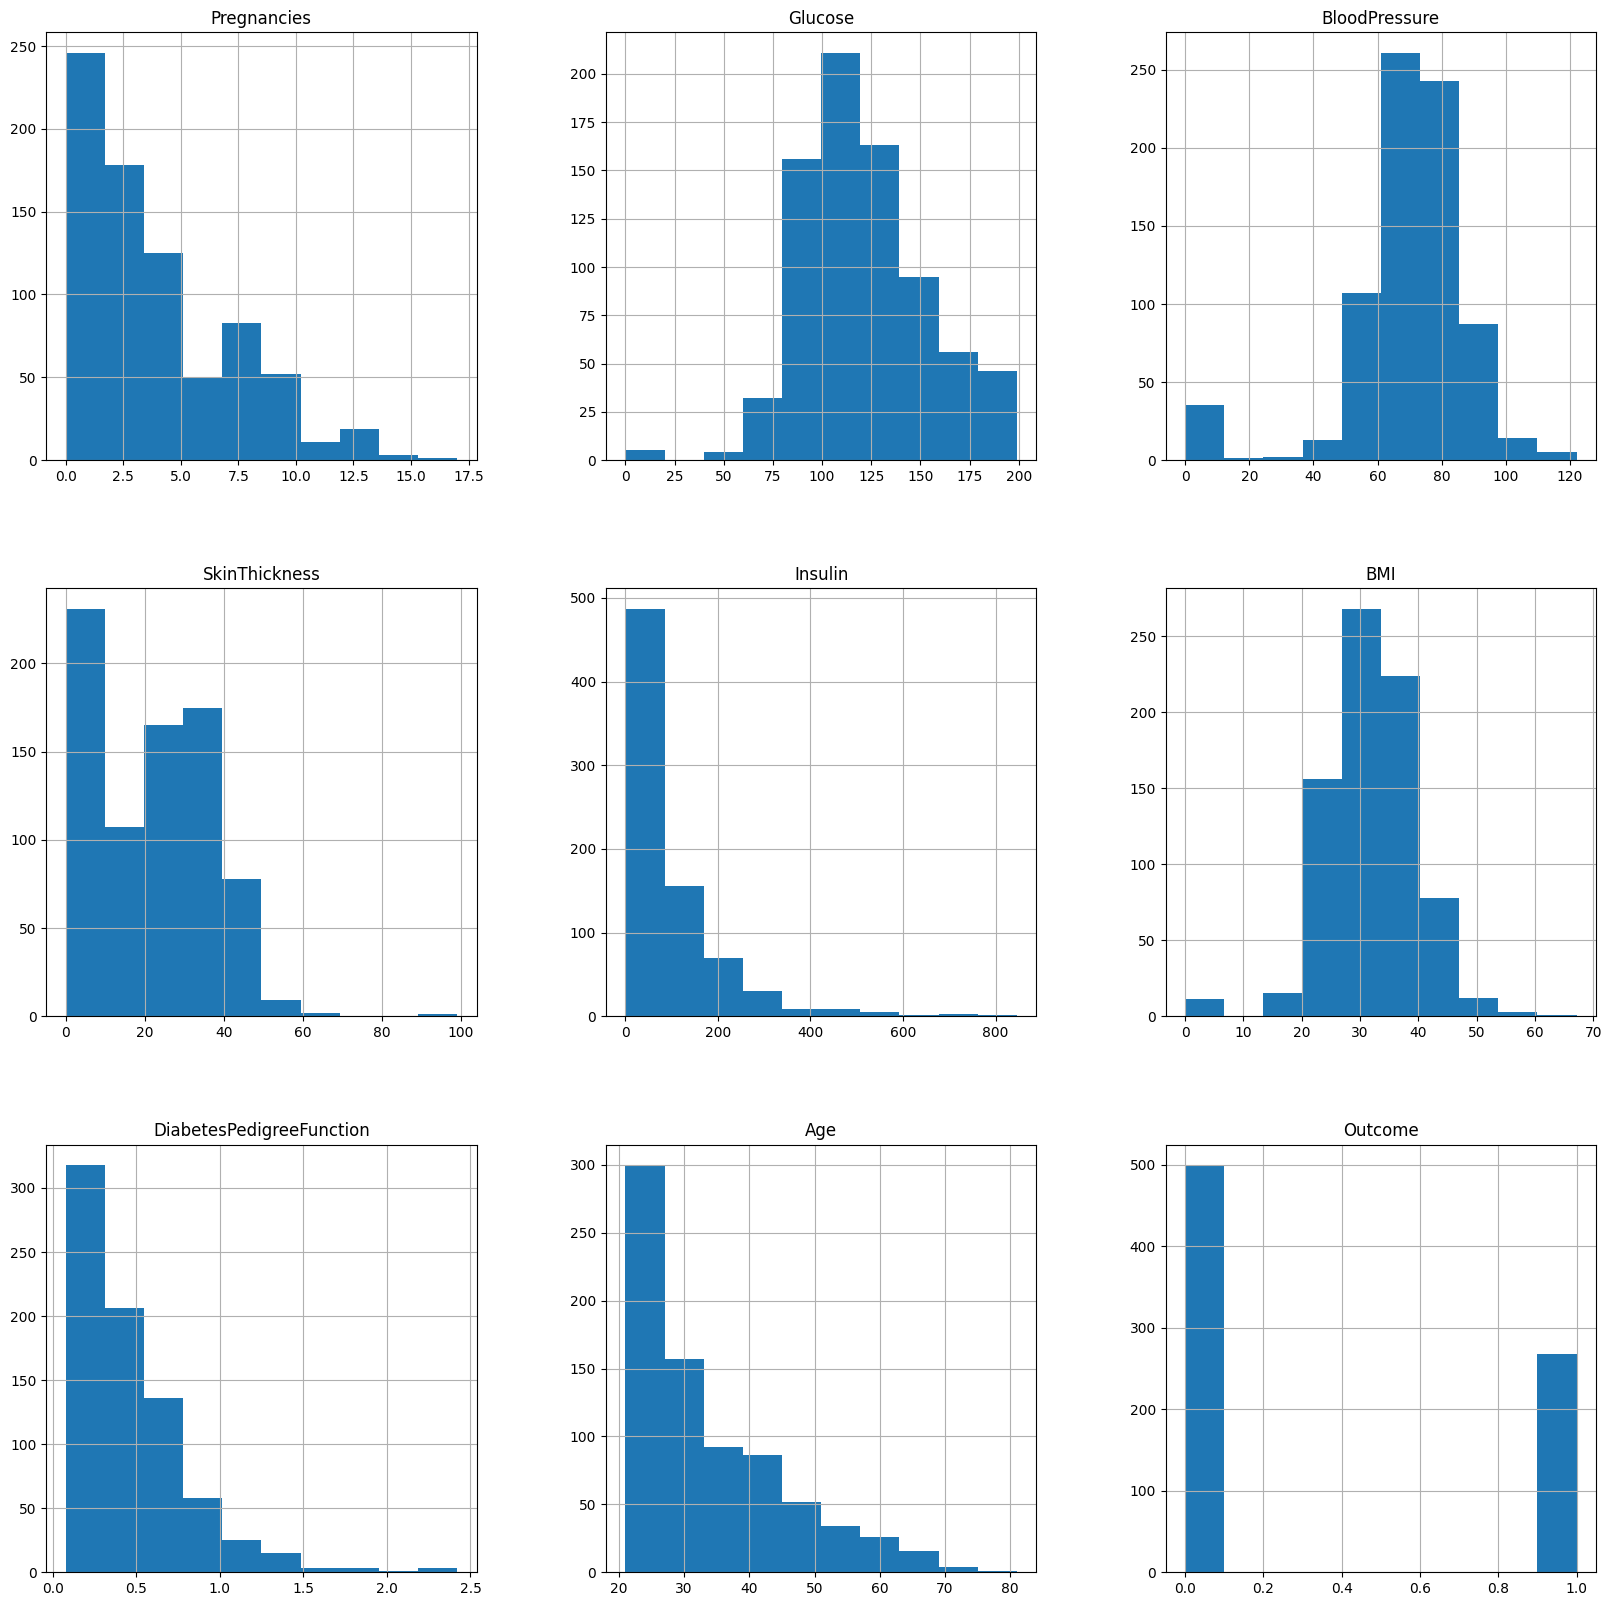

In [69]:
df.hist(figsize= (20,20))

## Kiểm tra ngoại lai

#### Kiểm tra ngoại lai sử dụng **IQR (Interquartile Range)**:
* Xác định Q1 (tứ phân vị thứ nhất): Giá trị ở vị trí 25% của dữ liệu (phân vị 25).
* Xác định Q3 (tứ phân vị thứ ba): Giá trị ở vị trí 75% của dữ liệu (phân vị 75).
* Tính IQR = Q3 - Q1.

Ý nghĩa:
* IQR biểu thị khoảng cách giữa 50% dữ liệu ở giữa, loại bỏ ảnh hưởng của các giá trị cực đại hoặc cực tiểu.
* Thường được dùng để xác định ngoại lai: Dữ liệu nằm ngoài khoảng [Q1 - 1.5IQR, Q3 + 1.5IQR] được coi là ngoại lai.

#### Sử dụng **biểu đồ hộp (boxplot)** để phát hiện ngoại lai:

Các thành phần chính trong biểu đồ cột:
* **Hộp:**
  * Đại diện cho khoảng tứ phân vị (IQR), là khoảng cách giữa Q1 (tứ phân vị thứ nhất, 25% dưới) và Q3 (tứ phân vị thứ ba, 75% trên).
  * Hộp chứa 50% dữ liệu ở giữa, cho thấy độ phân tán của phần trung tâm của tập dữ liệu.
* **Đường giữa hộp:**
  * Là giá trị Q2 (tứ phân vị thứ hai, 50%), tức là giá trị trung tâm của dữ liệu.
  * Nếu trung vị gần Q1 hơn Q3, dữ liệu lệch phải (skewed right); nếu gần Q3 hơn Q1, dữ liệu lệch trái (skewed left).
* **Râu (Whiskers):**
  * Là các đường kéo dài từ hai đầu của hộp, thể hiện phạm vi dữ liệu không phải ngoại lai.
  * Râu dưới kéo dài từ Q1 đến giá trị nhỏ nhất trong khoảng [Q1 - 1.5*IQR, Q1].
  * Râu trên kéo dài từ Q3 đến giá trị lớn nhất trong khoảng [Q3, Q3 + 1.5*IQR].
* **Ngoại lai (Outliers):**
  * Là các điểm dữ liệu nằm ngoài khoảng [Q1 - 1.5IQR, Q3 + 1.5IQR], thường được biểu diễn bằng các chấm hoặc ký hiệu riêng.
  * Những điểm này cho thấy các giá trị bất thường trong tập dữ liệu.

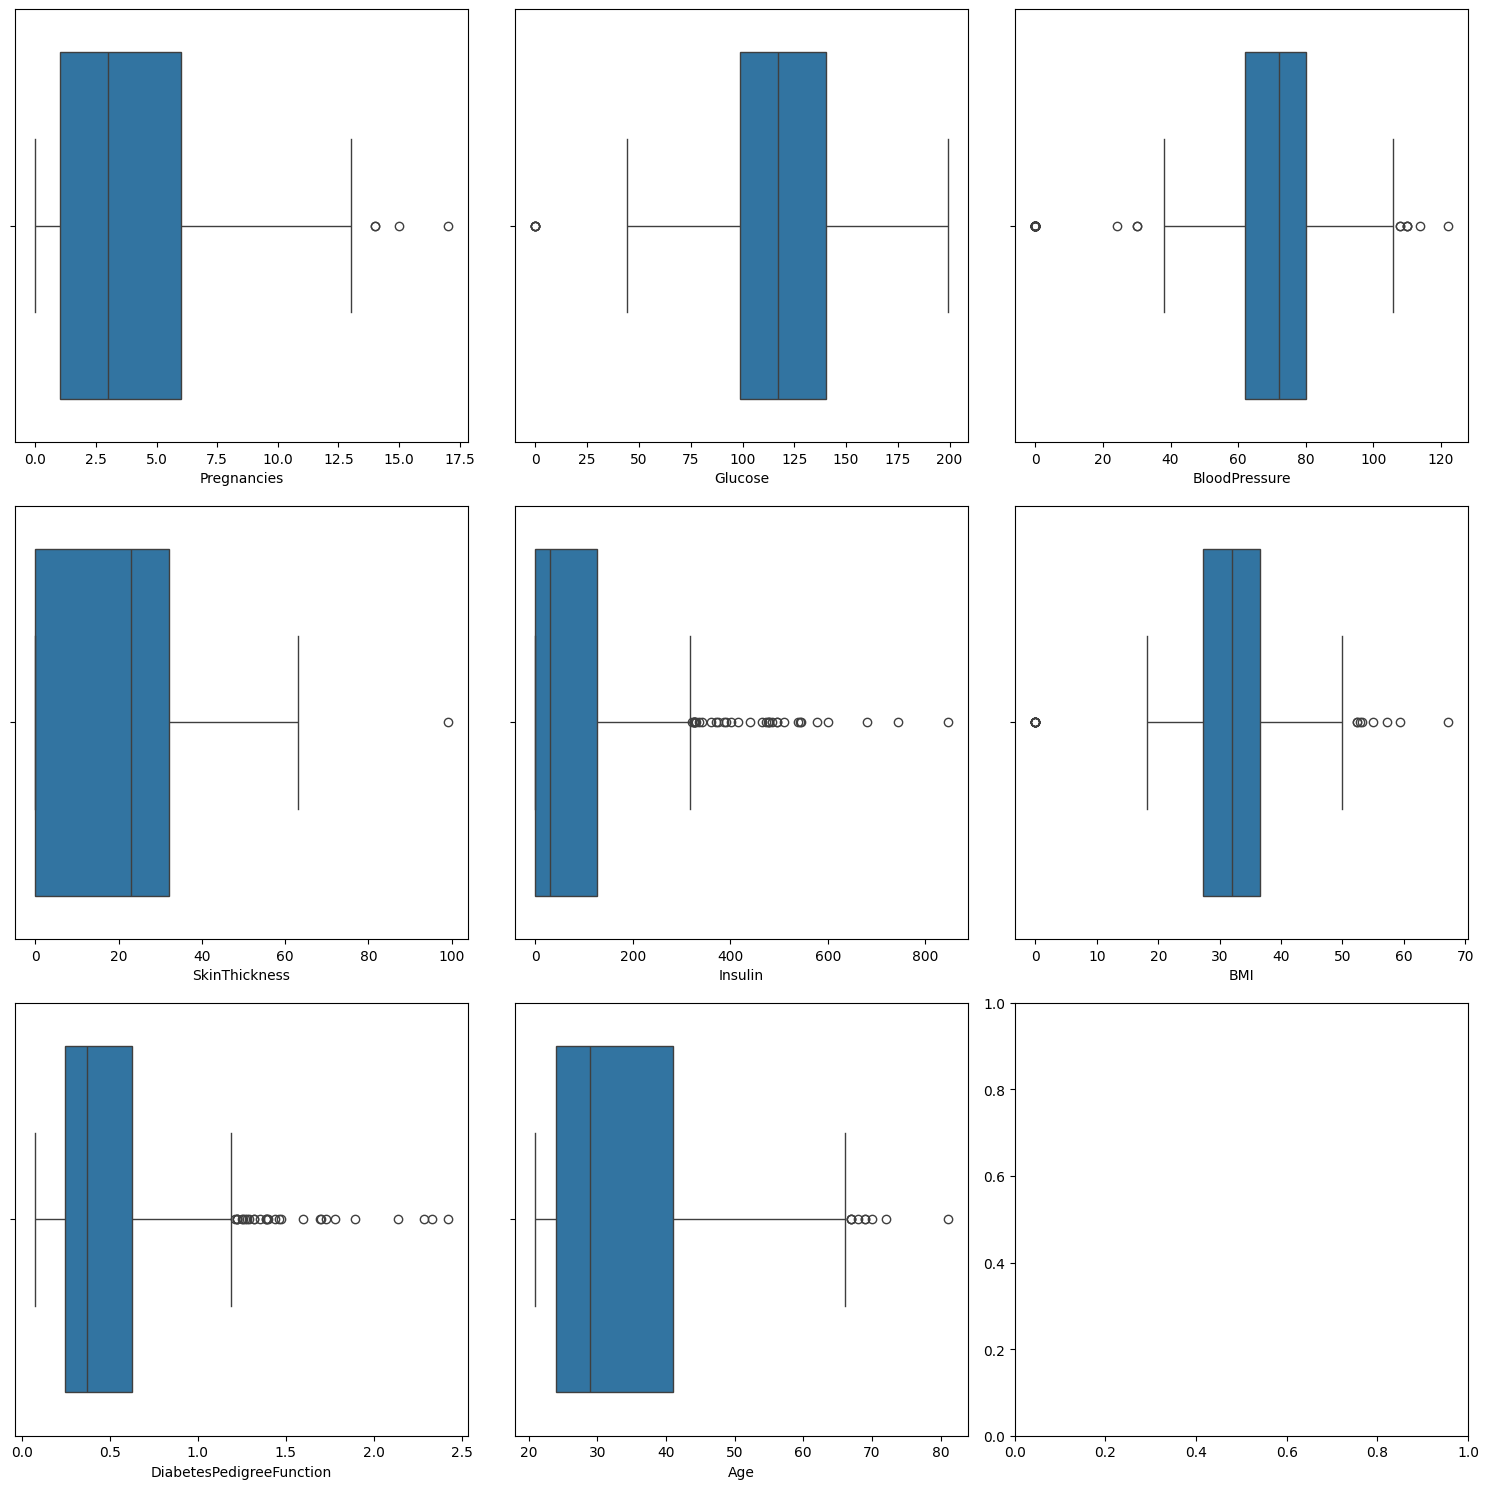

In [70]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(df.columns[:-1]):  
    sns.boxplot(data=df, x=col, ax=ax[i // 3, i % 3])
fig.tight_layout()


Hình ảnh biểu đồ hộp cho thấy tập dữ liệu có nhiều các giá trị ngoại lai

## Kiểm tra tương quan các trường dữ liệu

<Axes: >

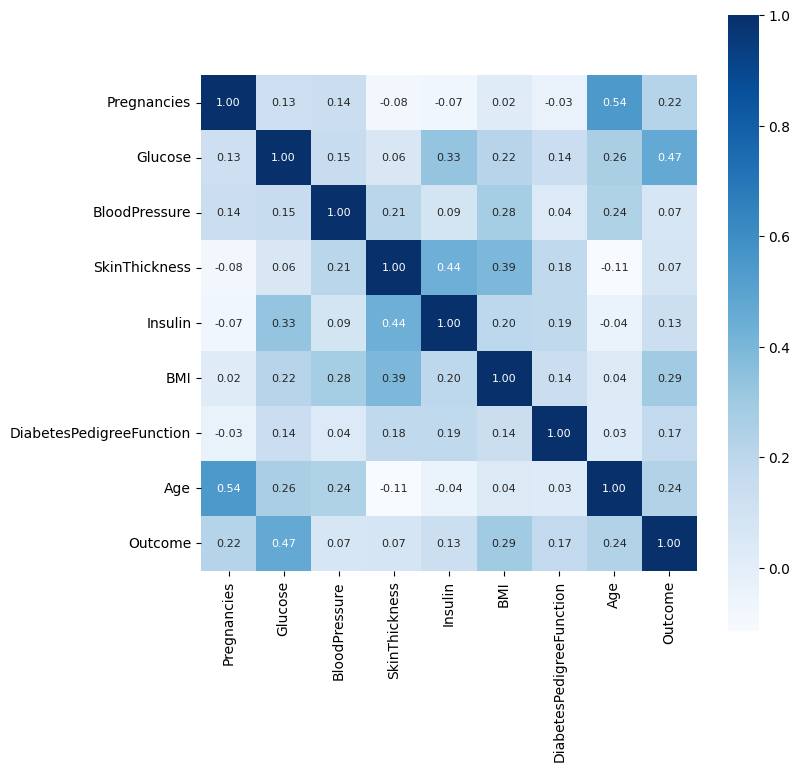

In [71]:
correlation = df.corr()
plt.figure(figsize= (8,8))
sns.heatmap(correlation, 
            cbar= True, 
            square= True, 
            fmt= '.2f', 
            annot= True, 
            annot_kws= {'size': 8}, 
            cmap= 'Blues')

Nhận thấy không có các cặp thuộc tính nào tương quan quá mạnh với nhau

## Kiểm tra số lượng mẫu có giá trị bằng 0

Nhận xét thấy dữ liệu trong các trường Glucose, BloodPressure, SkinThickness, Insulin, BMI có chứa các giá trị 0 là giá trị không thể xảy ra trên thực tế. Những giá trị này có thể là lỗi nhập liệu, missing value và cần được xử lý

Thay thế các giá trị 0 trong các trường trên thành giá trị NaN:

In [72]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]= df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

Đếm các giá trị 0:

In [73]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Có rất nhiều mẫu chứa giá trị 0 (đặc biệt là đối với thuộc tính Insulin)

Việc bỏ đi các mẫu này sẽ gây mất thông tin quan trọng từ các thuộc tính có giá trị khác 0 khác nên sẽ cần điền lại giá trị cho các mẫu này

Tiến hành điền bằng cách thay thế các giá trị trống bằng giá trị mean của các mẫu cùng nhãn lớp

In [74]:
def class_fill_na(column):
    not_null_val = df[df[column].notnull()][[column, 'Outcome']]
    mean_value = not_null_val.groupby(['Outcome'])[[column]].median().reset_index()
    df.loc[(df['Outcome'] == 0) & (df[column].isnull()), column] = mean_value[column][0]
    df.loc[(df['Outcome'] == 1) & (df[column].isnull()), column] = mean_value[column][1]

In [75]:
columns= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns:
    class_fill_na(column)

In [76]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Kiểm tra quan hệ chung

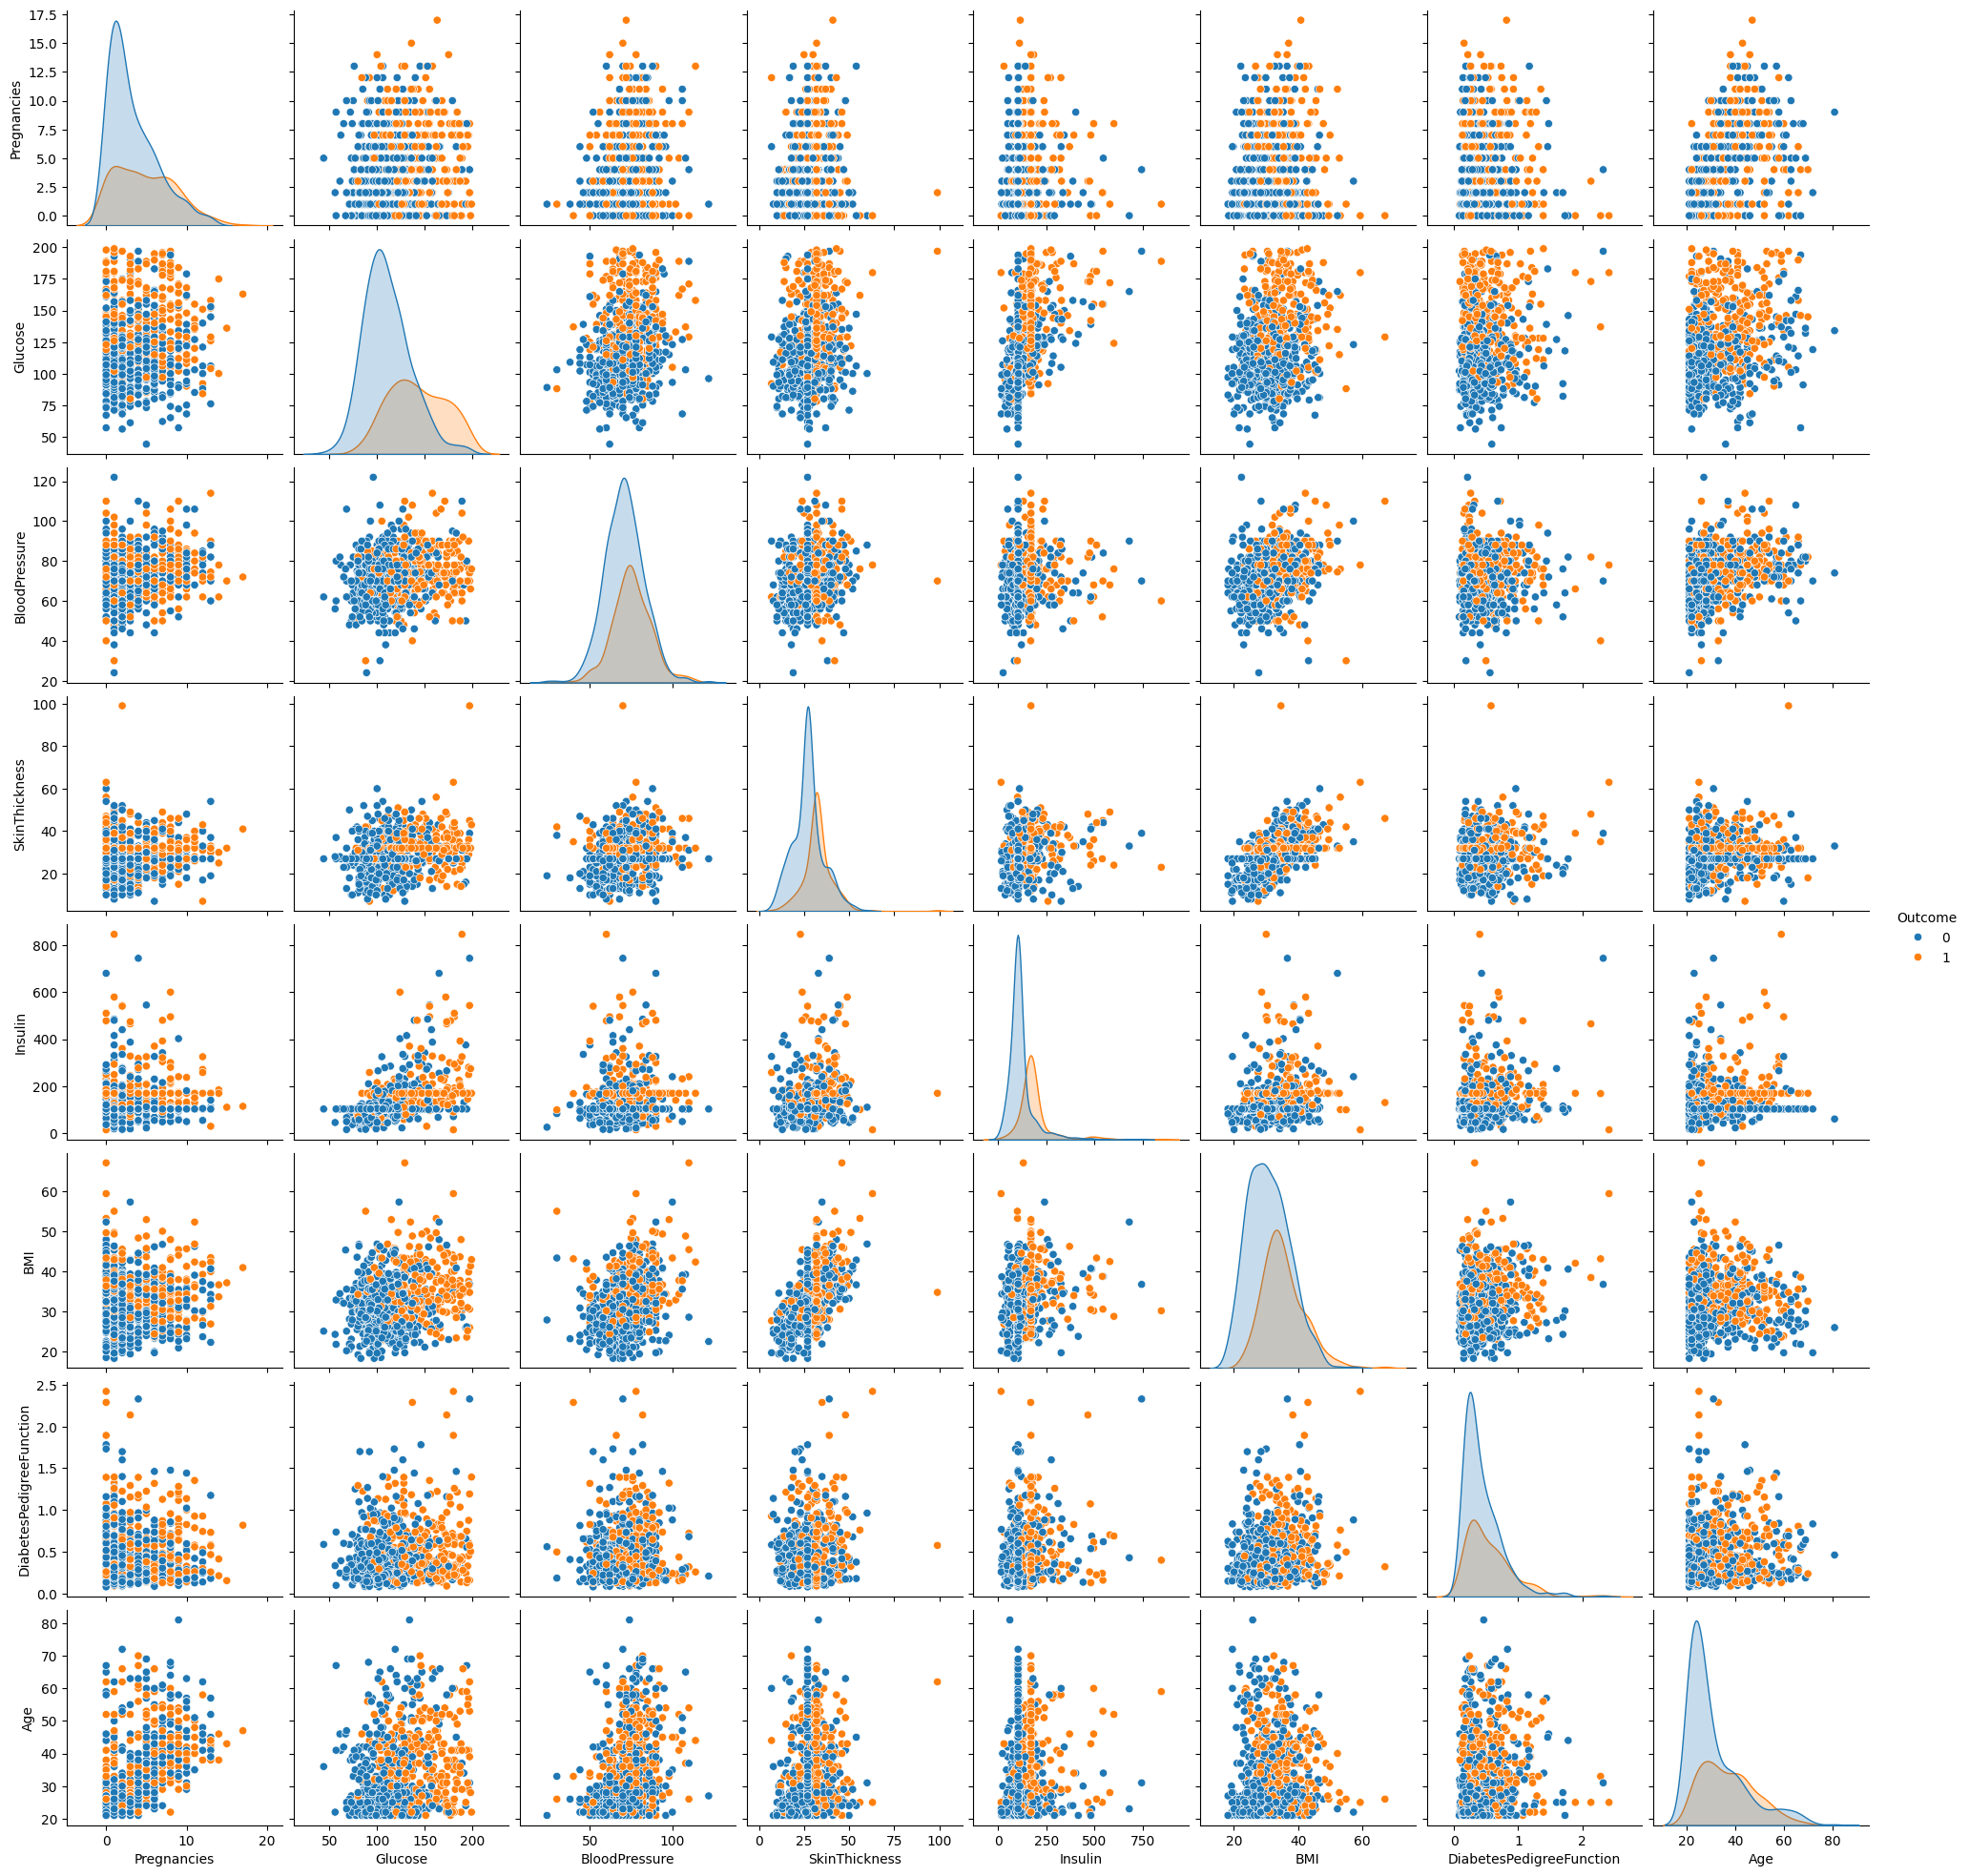

In [77]:
sns.pairplot(df, hue= 'Outcome')

## Biến đổi đặc trưng

Biến đổi đặc trưng là phương pháp để tăng cường hiệu năng dự đoán bằng các biến đổi không gian đặc trưng của tập dữ liệu. Các phương pháp biến đổi đặc trưng cho phép trích xuất đặc trưng mới cho mô hình học máy từ dữ liệu gốc, giúp mô hình học tốt hơn, chính xác hơn và tổng quát hóa tốt hơn trên dữ liệu mới.

Phương pháp biến đổi đặc trưng được dùng trong bài tập này là chia khoảng giá trị theo dữ liệu đánh giá y tế

### Glucose

Giá trị Glucose được chia theo 3 khoảng: Bình thường, Tiền tiểu đường và Tiểu đường

Theo Vinmec, lượng đường huyết Glucose sau khi thực hiện nghiệm pháp dung nạp Glucose giúp hỗ trợ chẩn đoán tiểu đường:
* Bình thường: Glucose < 140 mg/dl
* Tiền tiểu đường: 140 <= Glucose < 200 dl
* Tiểu đường: >= 200 mg/dl

https://www.vinmec.com/vie/bai-viet/chi-so-glucose-trong-mau-o-muc-bao-nhieu-la-mac-benh-tieu-duong-vi

In [78]:
New_Glucose = pd.Series(['Normal', 'Prediabetes', 'Diabetes'], dtype='category')

In [79]:
New_Glucose

0         Normal
1    Prediabetes
2       Diabetes
dtype: category
Categories (3, object): ['Diabetes', 'Normal', 'Prediabetes']

In [80]:
df['New_Glucose'] = New_Glucose
df.loc[df['Glucose'] < 140, 'New_Glucose'] = New_Glucose[0]
df.loc[(df['Glucose'] >= 140) & (df['Glucose'] <= 200), 'New_Glucose'] = New_Glucose[1]
df.loc[df['Glucose'] > 200, 'New_Glucose'] = New_Glucose[2]

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Prediabetes
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Prediabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal


### BMI

Các nghiên cứu y tế cho rằng béo phì và tiểu đường type 2 có mối liên hệ chặt chẽ với nhau

Chỉ số BMI cho biết tình trạng cơ thể

Theo Medlatec, giá trị BMI được chia theo các khoảng: 
* Thiếu cân: BMI < 18.5
* Khỏe mạnh: 18.5 <= BMI < 25 
* Thừa cân: 25 <= BMI < 30
* Béo phì loại I: 30 <= BMI < 35
* Béo phì loại II 35 <= BMI < 40
* Béo phì loại III: 40 <= BMI 

https://medlatec.vn/bmi-online?gad_source=1&gad_campaignid=22225949037&gbraid=0AAAAADN9HXy5Q5E352aBRw7ImqcwX5DCt&gclid=Cj0KCQjw_JzABhC2ARIsAPe3ynpm_WXIRb1GNjkQR6ggVfFIF7HQrhBiqzevCbF1-OF_sZSDC_yFst8aAuLvEALw_wcB

In [82]:
New_BMI = pd.Series(['Underweight', 'Healthy', 'Overweight', 'Obese I', 'Obese II', 'Obese III'], dtype='category')

In [83]:
New_BMI

0    Underweight
1        Healthy
2     Overweight
3        Obese I
4       Obese II
5      Obese III
dtype: category
Categories (6, object): ['Healthy', 'Obese I', 'Obese II', 'Obese III', 'Overweight', 'Underweight']

In [84]:
df['New_BMI'] = New_BMI
df.loc[df['BMI'] < 18.5, 'New_BMI'] = New_BMI[0]
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25), 'New_BMI'] = New_BMI[1]
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'New_BMI'] = New_BMI[2]
df.loc[(df['BMI'] >= 30) & (df['BMI'] < 35), 'New_BMI'] = New_BMI[3]
df.loc[(df['BMI'] >= 35) & (df['BMI'] < 40), 'New_BMI'] = New_BMI[4]
df.loc[df['BMI'] >= 40, 'New_BMI'] = New_BMI[5]

In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_BMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Prediabetes,Obese I
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Prediabetes,Healthy
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal,Obese III


### BloodPressure

https://nhathuoclongchau.com.vn/bai-viet/tai-sao-dai-thao-duong-gay-tang-huyet-ap.html

Các bài báo y tế chỉ ra rằng người bị bệnh đái tháo đường có nguy cơ bị tăng huyết áp cao hơn so với người không mắc bệnh.

https://medlineplus.gov/highbloodpressure.html

Theo trang Medlineplus, giá trị BloodPressure được chia thành các khoảng: 
* Bình thường: BP < 80
* Huyết áp cao giai đoạn I: 80 <= BP < 90
* Huyết áp cao giai đoạn II: 90 <= BP < 120
* Huyết áp tăng nghiêm trọng: BP >= 120

In [86]:
New_Blood_Pressure = pd.Series(['Normal', 'High Blood Pressure Stage I', 'High Blood Pressure Stage II', 'Hypertensive Crisis'], dtype= 'category')

In [87]:
New_Blood_Pressure

0                          Normal
1     High Blood Pressure Stage I
2    High Blood Pressure Stage II
3             Hypertensive Crisis
dtype: category
Categories (4, object): ['High Blood Pressure Stage I', 'High Blood Pressure Stage II', 'Hypertensive Crisis', 'Normal']

In [88]:
df['New_Blood_Pressure'] = New_Blood_Pressure
df.loc[df['BloodPressure'] < 80, 'New_Blood_Pressure'] = New_Blood_Pressure[0]
df.loc[(df['BloodPressure'] >= 80) & (df['BloodPressure'] < 90), 'New_Blood_Pressure'] = New_Blood_Pressure[1]
df.loc[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 120), 'New_Blood_Pressure'] = New_Blood_Pressure[2]
df.loc[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 120), 'New_Blood_Pressure'] = New_Blood_Pressure[2]
df.loc[df['BloodPressure'] >= 120, 'New_Blood_Pressure'] = New_Blood_Pressure[3]

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_BMI,New_Blood_Pressure
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Prediabetes,Obese I,Normal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Prediabetes,Healthy,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal,Obese III,Normal


### Insulin

Giá trị Insulin được chia theo khoảng bình thường và bất thường

https://medlatec.vn/tin-tuc/insulin--hormon-giup-dieu-hoa-luong-duong-trong-mau%C2%A0-s159-n18195#:~:text=Insulin%20l%C3%A0%20m%E1%BB%99t%20hormon%20c%C3%B3,276%2C0%20%C2%B5U%2FmL.

Trang Medlatec cũng chỉ ra rằng, giá trị nồng Insulin trong máu sau 2 giờ xét nghiệm được cho là bình thường nếu nằm trong khoảng 16 - 166 mU/mL

In [90]:
New_Insulin = pd.Series(['Normal', 'Abnormal'], dtype= 'category')

In [91]:
New_Insulin

0      Normal
1    Abnormal
dtype: category
Categories (2, object): ['Abnormal', 'Normal']

In [92]:
df['New_Insulin'] = New_Insulin
df.loc[df['Insulin'] < 16, 'New_Insulin'] = New_Insulin[1]
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] <= 166), 'New_Insulin'] = New_Insulin[0]
df.loc[df['Insulin'] > 166, 'New_Insulin'] = New_Insulin[1]

In [93]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose,New_BMI,New_Blood_Pressure,New_Insulin
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Prediabetes,Obese I,Normal,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Prediabetes,Healthy,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Normal,Obese III,Normal,Abnormal


## Mã hóa OneHotEncoding cho các trường nhị phân

In [94]:
df = pd.get_dummies(df, columns = ["New_Glucose", "New_BMI", "New_Blood_Pressure", "New_Insulin"])#, drop_first= True)

In [95]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Diabetes,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,...,False,False,False,False,False,False,False,True,True,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,...,False,False,True,False,False,False,False,True,False,True
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,...,False,False,False,False,False,False,False,True,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,...,False,False,True,False,False,False,False,True,False,True
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,...,False,True,False,False,False,False,False,True,True,False


In [96]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal'],
      dtype='object')

In [97]:
categorical_df = df[['New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal']]

In [98]:
categorical_df

,New_Glucose_Diabetes,New_Glucose_Normal,New_Glucose_Prediabetes,New_BMI_Healthy,New_BMI_Obese I,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
0,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False
1,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True
2,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False
3,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True
4,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False
764,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True
765,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True
766,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False


In [99]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

In [100]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_Glucose_Diabetes,New_Glucose_Normal,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,False,False,...,False,False,False,False,False,False,False,True,True,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,False,True,...,False,False,True,False,False,False,False,True,False,True
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,False,False,...,False,False,False,False,False,False,False,True,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False,True,...,False,False,True,False,False,False,False,True,False,True
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,False,True,...,False,True,False,False,False,False,False,True,True,False


## Chia tập dữ liệu

Do tập dữ liệu bị mất cân bằng nhãn lớp nên thực hiện chia theo chiến lược **Stratified Sampling (Lấy mẫu phân tầng)**

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify= y)

In [103]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_Glucose_Diabetes,New_Glucose_Normal,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24,False,True,...,False,False,True,False,False,False,False,True,False,True
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40,False,True,...,False,False,True,False,False,False,False,True,False,True
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25,False,True,...,False,False,False,False,False,False,False,True,False,True
46,1,146.0,56.0,27.0,102.5,29.7,0.564,29,False,False,...,False,False,True,False,False,False,False,True,False,True
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2,134.0,70.0,32.0,169.5,28.9,0.542,23,False,True,...,False,False,True,False,False,False,False,True,True,False
113,4,76.0,62.0,27.0,102.5,34.0,0.391,25,False,True,...,False,False,False,False,False,False,False,True,False,True
556,1,97.0,70.0,40.0,102.5,38.1,0.218,30,False,True,...,True,False,False,False,False,False,False,True,False,True
667,10,111.0,70.0,27.0,169.5,27.5,0.141,40,False,True,...,False,False,True,False,False,False,False,True,True,False


In [104]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_Glucose_Diabetes,New_Glucose_Normal,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
44,7,159.0,64.0,27.0,102.5,27.4,0.294,40,False,False,...,False,False,True,False,False,False,False,True,False,True
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47,False,True,...,True,False,False,False,False,True,False,False,False,True
700,2,122.0,76.0,27.0,200.0,35.9,0.483,26,False,True,...,True,False,False,False,False,False,False,True,True,False
630,7,114.0,64.0,32.0,169.5,27.4,0.732,34,False,True,...,False,False,True,False,False,False,False,True,True,False
81,2,74.0,70.0,27.0,102.5,30.1,0.102,22,False,True,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,False,True,...,False,False,False,False,False,False,False,True,False,True
637,2,94.0,76.0,18.0,66.0,31.6,0.649,23,False,True,...,False,False,False,False,False,False,False,True,False,True
593,2,82.0,52.0,22.0,115.0,28.5,1.699,25,False,True,...,False,False,True,False,False,False,False,True,False,True
425,4,184.0,78.0,39.0,277.0,37.0,0.264,31,False,False,...,True,False,False,False,False,False,False,True,True,False


## Chuẩn hóa bằng RobustScaler

Tập dữ liệu chứa số lượng lớn các giá trị ngoại lai nên thực hiện chuẩn hóa RobustScaler trên các trường thuộc tính kiểu Numerical

RobustScaler chuẩn hóa dữ liệu bằng cách sử dụng tứ phân vị (quartiles) thay vì giá trị trung bình và độ lệch chuẩn, giúp nó ổn định (robust) hơn trước các giá trị ngoại lai. Cụ thể:
$$x_{scaled} = \frac{x - median}{Q_{3} - Q_{1}} $$

Trong đó:
* $Q_3$ là tứ phân vị thứ ba (quantile 75%)
* $Q_1$ là tứ phân vị thứ nhất (quantile 25%)
* $median$ là giá trị trung vị 

In [105]:
from sklearn.preprocessing import StandardScaler, RobustScaler

**Tách các trường categorical**

In [106]:
X_train_categorical = X_train[['New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal']]

X_test_categorical = X_test[['New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal']]

In [107]:
X_train = X_train.drop(['New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal'], axis= 1)

X_test = X_test.drop(['New_Glucose_Diabetes', 'New_Glucose_Normal', 'New_Glucose_Prediabetes',
       'New_BMI_Healthy', 'New_BMI_Obese I', 'New_BMI_Obese II',
       'New_BMI_Obese III', 'New_BMI_Overweight', 'New_BMI_Underweight',
       'New_Blood_Pressure_High Blood Pressure Stage I',
       'New_Blood_Pressure_High Blood Pressure Stage II',
       'New_Blood_Pressure_Hypertensive Crisis', 'New_Blood_Pressure_Normal',
       'New_Insulin_Abnormal', 'New_Insulin_Normal'], axis= 1)

**Chuẩn hóa trên các trường Numerical**

In [108]:
#scaler =StandardScaler()
r_scaler = RobustScaler()

X_train_columns = X_train.columns
X_train_index = X_train.index
X_train = r_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns= X_train_columns, index= X_train_index)

X_test_columns = X_test.columns
X_test_index = X_test.index
X_test = r_scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns= X_test_columns, index= X_test_index)

In [109]:
X_train = pd.concat([X_train, X_train_categorical], axis= 1)
X_test = pd.concat([X_test, X_test_categorical], axis= 1)

In [110]:
# X_train = pd.concat([X_train, X_train_categorical], axis= 1)
# X_test = pd.concat([X_test, X_test_categorical], axis= 1)

In [111]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_Glucose_Diabetes,New_Glucose_Normal,...,New_BMI_Obese II,New_BMI_Obese III,New_BMI_Overweight,New_BMI_Underweight,New_Blood_Pressure_High Blood Pressure Stage I,New_Blood_Pressure_High Blood Pressure Stage II,New_Blood_Pressure_Hypertensive Crisis,New_Blood_Pressure_Normal,New_Insulin_Abnormal,New_Insulin_Normal
353,-0.4,-0.658537,-0.625,-2.285714,-0.888060,-0.585915,0.500951,-0.294118,False,True,...,False,False,True,False,False,False,False,True,False,True
711,0.4,0.219512,0.375,-0.142857,-1.201493,-0.315493,0.143310,0.647059,False,True,...,False,False,True,False,False,False,False,True,False,True
373,-0.2,-0.292683,-0.875,1.714286,-0.126866,0.281690,-0.399493,-0.235294,False,True,...,False,False,False,False,False,False,False,True,False,True
46,-0.4,0.707317,-1.000,-0.142857,0.000000,-0.304225,0.460368,0.000000,False,False,...,False,False,True,False,False,False,False,True,False,True
682,-0.6,-0.536585,-0.500,1.571429,0.037313,1.374648,-0.041852,-0.411765,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-0.2,0.414634,-0.125,0.571429,1.000000,-0.394366,0.404566,-0.352941,False,True,...,False,False,True,False,False,False,False,True,True,False
113,0.2,-1.000000,-0.625,-0.142857,0.000000,0.180282,0.021560,-0.235294,False,True,...,False,False,False,False,False,False,False,True,False,True
556,-0.4,-0.487805,-0.125,1.714286,0.000000,0.642254,-0.417248,0.058824,False,True,...,True,False,False,False,False,False,False,True,False,True
667,1.4,-0.146341,-0.125,-0.142857,1.000000,-0.552113,-0.612555,0.647059,False,True,...,False,False,True,False,False,False,False,True,True,False


# Huấn luyện mô hình

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [113]:
def print_scores(y_true, y_pred):
    print(classification_report(y_true, y_pred))

## KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

Các tham số:
* n_neighbors: số lượng hàng xóm (k-NN)
* weights: trọng số
  * uniform: Tất cả các láng giềng gần nhất (k neighbors) có **trọng số bằng nhau**, bất kể khoảng cách của chúng đến điểm cần dự đoán.
  * distance: Trọng số của mỗi láng giềng được tính dựa trên **nghịch đảo khoảng cách** (inverse distance) từ điểm cần dự đoán đến láng giềng đó. Láng giềng **càng gần thì có trọng số lớn hơn.**
* metric: hàm khoảng cách
  * euclidean: Khoảng cách Euclid
    $$d(x_1,x_2) = ||x_1 - x_2||_2$$
  * manhattan: Khoảng cách Manhattan
    $$d(x_1,x_2) = ||x_1 - x_2||_1$$

In [115]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']#, 'minkowski']
}

grid_search = GridSearchCV(estimator= KNeighborsClassifier(),
                           param_grid= param_grid,
                           cv= 5,
                           scoring= make_scorer(f1_score, average= 'weighted')
                           )

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print_scores(y_test, y_pred)
print(knn_model.get_params())

Best param:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.8555951521966362
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.79      0.85      0.82        54

    accuracy                           0.87       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


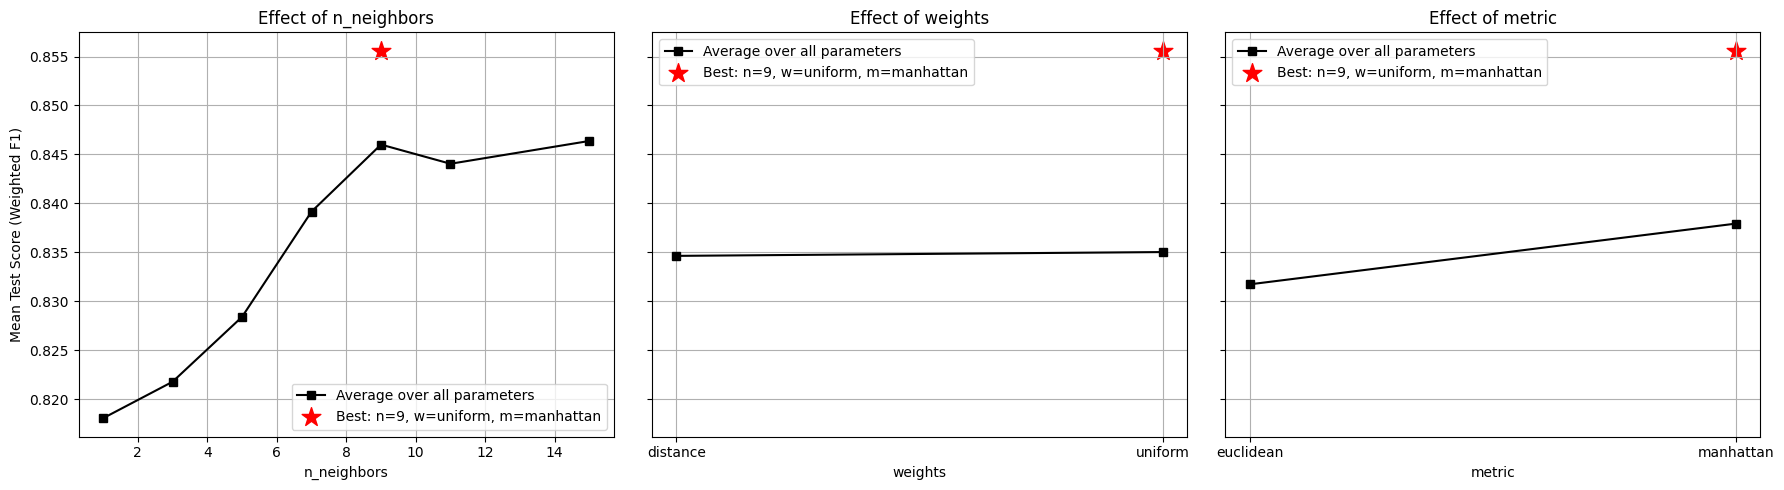

In [116]:
results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_n_neighbors = best_params['n_neighbors']
best_weights = best_params['weights']
best_metric = best_params['metric']

# Create a figure with 3 subplots in a single row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: Effect of n_neighbors
mean_scores_n = results.groupby('param_n_neighbors')['mean_test_score'].mean().reset_index()
ax1.plot(mean_scores_n['param_n_neighbors'], mean_scores_n['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
mask_best = (results['param_n_neighbors'] == best_n_neighbors) & \
            (results['param_weights'] == best_weights) & \
            (results['param_metric'] == best_metric)
ax1.scatter([best_n_neighbors], [best_score], color='red', s=200, marker='*', 
            label=f'Best: n={best_n_neighbors}, w={best_weights}, m={best_metric}')
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('Mean Test Score (Weighted F1)')
ax1.set_title('Effect of n_neighbors')
ax1.grid(True)
ax1.legend()

# Plot 2: Effect of weights
mean_scores_w = results.groupby('param_weights')['mean_test_score'].mean().reset_index()
ax2.plot(mean_scores_w['param_weights'], mean_scores_w['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
ax2.scatter([best_weights], [best_score], color='red', s=200, marker='*', 
            label=f'Best: n={best_n_neighbors}, w={best_weights}, m={best_metric}')
ax2.set_xlabel('weights')
ax2.set_title('Effect of weights')
ax2.grid(True)
ax2.legend()

# Plot 3: Effect of metric (assuming similar structure)
mean_scores_m = results.groupby('param_metric')['mean_test_score'].mean().reset_index()
ax3.plot(mean_scores_m['param_metric'], mean_scores_m['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
ax3.scatter([best_metric], [best_score], color='red', s=200, marker='*', 
            label=f'Best: n={best_n_neighbors}, w={best_weights}, m={best_metric}')
ax3.set_xlabel('metric')
ax3.set_title('Effect of metric')
ax3.grid(True)
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

Các tham số:
* criterion: Tiêu chí đánh giá chất lượng của một phân tách
  * gini: 
        $$gini(s) = 1 - \sum_{i = 1}^{n}p_i^2$$
        $$\text{gini-index(S, A)} = \text{gini(S)} - \sum_{v \epsilon Values(A)} \frac{\left| \text{S}_v \right|}{\left| \text{S} \right|} \text{gini}(\text{S}_v)$$
    * gini -> 0: Tất cả các mẫu trong node thuộc về cùng một lớp
    * gini -> 1 - 1/n: Các mẫu trong node được phân bố đều về các nhãn lớp
  * entropy: 
        $$\text{Entropy(S)} = -\sum_{i = 1}^{C}p_ilog_2p_i$$
        $$\text{Entropy(S, A)} = \text{Entropy(S)} - \sum_{v \epsilon Values(A)} \frac{\left| \text{S}_v \right|}{\left| \text{S} \right|} \text{Entropy}(\text{S}_v)$$
    * entropy -> 0: Tất cả các mẫu trong node thuộc về cùng một lớp
    * entropy -> 1: Các mẫu trong node được phân bố đều về các nhãn lớp
* max_depth: Độ sâu tối đa của cây

In [156]:
param_grid = {
    'criterion': ['gini', 'entropy'],#, 'log_loss'],
    'max_depth': [5, 10, 15, 20, 25],
    #'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_train, y_train)
print("Best param: ", grid_search.best_params_)

dt_model= grid_search.best_estimator_
dt_model.fit(X_train, y_train)

y_pred= dt_model.predict(X_test)
print_scores(y_test, y_pred)

Best param:  {'criterion': 'entropy', 'max_depth': 25}
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       100
           1       0.79      0.76      0.77        54

    accuracy                           0.84       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.84      0.84      0.84       154



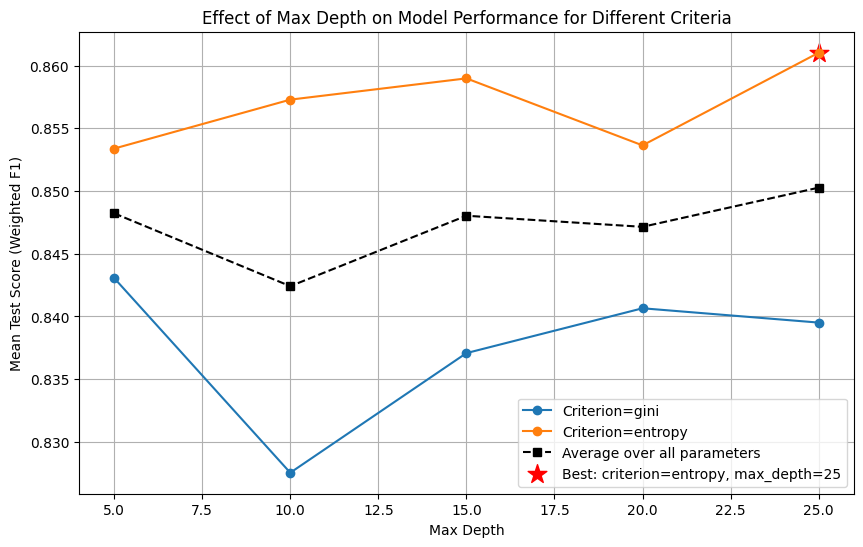

In [157]:
results = pd.DataFrame(grid_search.cv_results_)

# Đảm bảo kiểu dữ liệu của max_depth là số nguyên
results['param_max_depth'] = results['param_max_depth'].astype(int)
results['param_criterion'] = results['param_criterion']
mean_scores = results.groupby('param_max_depth')['mean_test_score'].mean().reset_index()
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
for criterion in param_grid['criterion']:
    # Lọc dữ liệu theo criterion
    mask = results['param_criterion'] == criterion
    plt.plot(results[mask]['param_max_depth'], results[mask]['mean_test_score'], 
             marker='o', label=f'Criterion={criterion}')

plt.plot(mean_scores['param_max_depth'], mean_scores['mean_test_score'], 
         marker='s', linestyle='--', color='black', label='Average over all parameters')


# Đánh dấu tổ hợp tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_criterion = best_params['criterion']
best_max_depth = best_params['max_depth']
mask_best = (results['param_criterion'] == best_criterion) & (results['param_max_depth'] == best_max_depth)
plt.scatter([best_max_depth], [best_score], color='red', s=200, marker='*', 
            label=f'Best: criterion={best_criterion}, max_depth={best_max_depth}')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score (Weighted F1)')
plt.title('Effect of Max Depth on Model Performance for Different Criteria')
plt.grid(True)
plt.legend()
plt.show()

In [158]:
import joblib
joblib.dump(dt_model, 'decision_tree.pkl')

['decision_tree.pkl']

## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

Các tham số:
* n_estimators: số lượng cây trong rừng

In [161]:
param_grid = {
    'criterion': ['gini', 'entropy'],#, 'log_loss'],
    'n_estimators': [100, 150, 200, 250]
}

grid_search = GridSearchCV(estimator= RandomForestClassifier(class_weight= 'balanced'),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)

grid_search.fit(X_train, y_train)
print("best param: ", grid_search.best_params_)

rf_model = grid_search.best_estimator_
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_true= y_test, y_pred= y_pred))

best param:  {'criterion': 'gini', 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.80      0.83      0.82        54

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



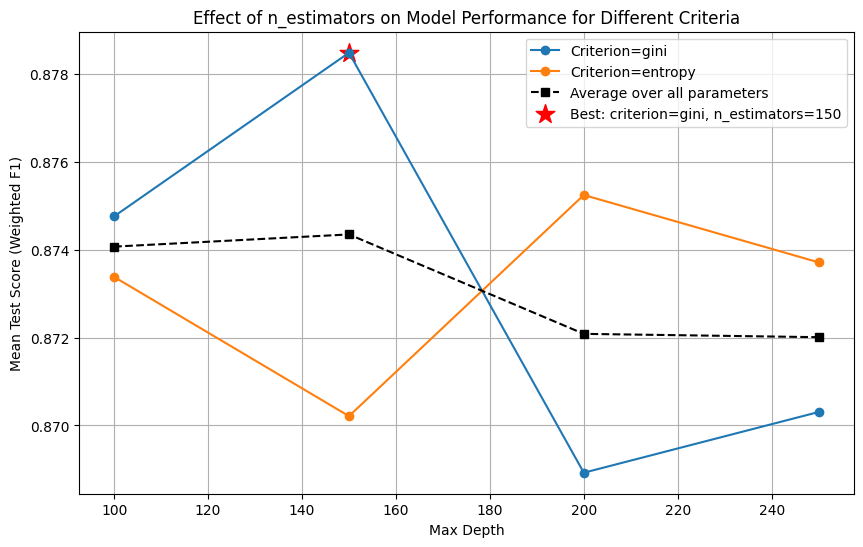

In [162]:
results = pd.DataFrame(grid_search.cv_results_)

# Đảm bảo kiểu dữ liệu của max_depth là số nguyên
results['param_n_estimators'] = results['param_n_estimators'].astype(int)
results['param_criterion'] = results['param_criterion']
mean_scores = results.groupby('param_n_estimators')['mean_test_score'].mean().reset_index()
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
for criterion in param_grid['criterion']:
    # Lọc dữ liệu theo criterion
    mask = results['param_criterion'] == criterion
    plt.plot(results[mask]['param_n_estimators'], results[mask]['mean_test_score'], 
             marker='o', label=f'Criterion={criterion}')

plt.plot(mean_scores['param_n_estimators'], mean_scores['mean_test_score'], 
         marker='s', linestyle='--', color='black', label='Average over all parameters')


# Đánh dấu tổ hợp tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_criterion = best_params['criterion']
best_max_depth = best_params['n_estimators']
mask_best = (results['param_criterion'] == best_criterion) & (results['param_n_estimators'] == best_max_depth)
plt.scatter([best_max_depth], [best_score], color='red', s=200, marker='*', 
            label=f'Best: criterion={best_criterion}, n_estimators={best_max_depth}')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score (Weighted F1)')
plt.title('Effect of n_estimators on Model Performance for Different Criteria')
plt.grid(True)
plt.legend()
plt.show()

In [163]:
joblib.dump(rf_model, 'random_forest.pkl')

['random_forest.pkl']

## SVM

In [123]:
from sklearn.svm import SVC

Các tham số:
* C: Hệ số phạt, điều chỉnh sự cân bằng giữa tối đa hóa biên và hình phạt phân loại sai.
* gamma: Hệ số trong hàm nhân
* kernel: Hàm nhân

In [137]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    #'probability': [True],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
grid_search = GridSearchCV(estimator= SVC(),
                           param_grid= param_grid,
                           scoring= make_scorer(f1_score, average= 'weighted'),
                           cv= 10)
grid_search.fit(X_train, y_train)
print("best param: ", grid_search.best_params_)

svm_model = grid_search.best_estimator_
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_true= y_test, y_pred= y_pred))


best param:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       0.80      0.80      0.80        54

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



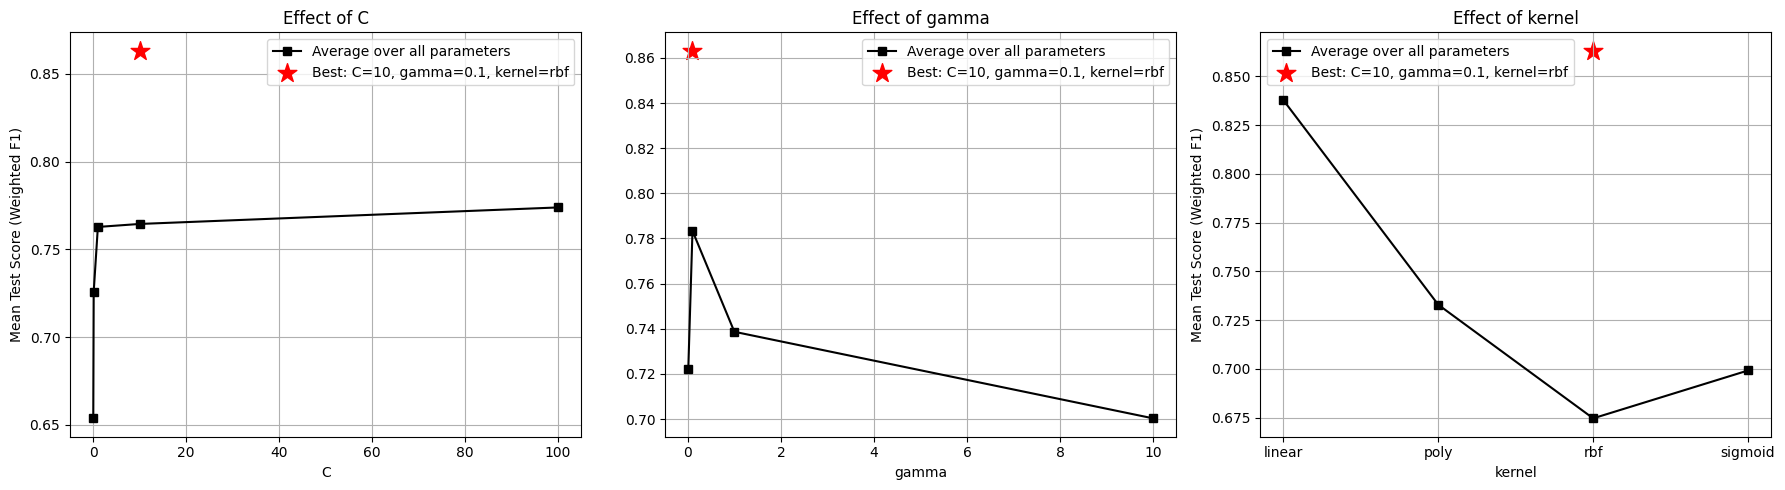

In [150]:
results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = best_params['kernel']

# Create a figure with 3 subplots in a single row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Effect of C
mean_scores_n = results.groupby('param_C')['mean_test_score'].mean().reset_index()
ax1.plot(mean_scores_n['param_C'], mean_scores_n['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
mask_best = (results['param_C'] == best_C) & \
            (results['param_gamma'] == best_gamma) & \
            (results['param_kernel'] == best_kernel)
ax1.scatter([best_C], [best_score], color='red', s=200, marker='*', 
            label=f'Best: C={best_C}, gamma={best_gamma}, kernel={best_kernel}')
ax1.set_xlabel('C')
ax1.set_ylabel('Mean Test Score (Weighted F1)')
ax1.set_title('Effect of C')
ax1.grid(True)
ax1.legend()

# Plot 2: Effect of gamma
mean_scores_w = results.groupby('param_gamma')['mean_test_score'].mean().reset_index()
ax2.plot(mean_scores_w['param_gamma'], mean_scores_w['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
ax2.scatter([best_gamma], [best_score], color='red', s=200, marker='*', 
            label=f'Best: C={best_C}, gamma={best_gamma}, kernel={best_kernel}')
ax2.set_xlabel('gamma')
ax2.set_title('Effect of gamma')
ax2.grid(True)
ax2.legend()

# Plot 3: Effect of kernel (assuming similar structure)
mean_scores_kernel = results.groupby('param_kernel')['mean_test_score'].mean().reset_index()
ax3.plot(mean_scores_kernel['param_kernel'], mean_scores_kernel['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
ax3.scatter([best_kernel], [best_score], color='red', s=200, marker='*', 
            label=f'Best: C={best_C}, gamma={best_gamma}, kernel={best_kernel}')
ax3.set_xlabel('kernel')
ax3.set_ylabel('Mean Test Score (Weighted F1)')
ax3.set_title('Effect of kernel')
ax3.grid(True)
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [142]:
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
52,0.009774,0.001552,0.005103,0.001213,10.0,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.819296,0.83871,...,0.854047,0.853241,0.885854,0.916362,0.884555,0.828123,0.865073,0.863174,0.028778,1


In [144]:
model = SVC(C= 10, gamma= 0.1, kernel= 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       100
           1       0.75      0.83      0.79        54

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.85      0.84      0.85       154



## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

Các tham số:
* C: Hệ số phạt quá nhỏ có thể dẫn đến overfitting trong khi quá lớp thì mô hình có thể bị underfitting
* max_iter: Số lần lặp tối đa đảm bảo bài toán hội tụ và không tốn quá nhiều thời gian

In [74]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(estimator= LogisticRegression(),
                           param_grid= param_grid,
                           cv= 10,
                           scoring= make_scorer(f1_score, average= 'weighted'))
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

lr_model = grid_search.best_estimator_
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print_scores(y_test, y_pred)

{'C': 0.1, 'max_iter': 100}
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       100
           1       0.77      0.80      0.78        54

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.85      0.84      0.84       154



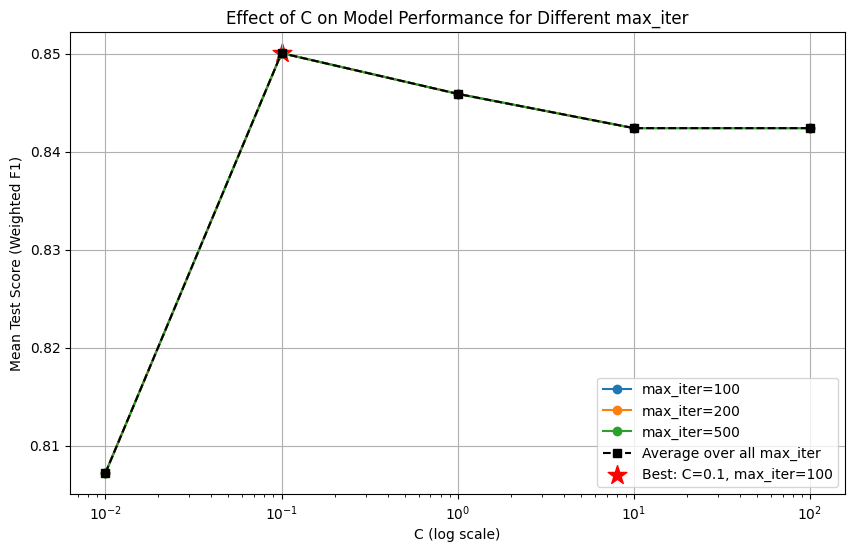

In [82]:
# Trích xuất dữ liệu từ cv_results_
results = pd.DataFrame(grid_search.cv_results_)

# Đảm bảo kiểu dữ liệu của C là số thực
results['param_C'] = results['param_C'].astype(float)
results['param_max_iter'] = results['param_max_iter'].astype(int)

# Tính điểm số trung bình theo C trên tất cả các giá trị của max_iter
mean_scores = results.groupby('param_C')['mean_test_score'].mean().reset_index()

# Tính điểm số trung bình theo C cho từng max_iter
mean_scores_by_max_iter = results.groupby(['param_C', 'param_max_iter'])['mean_test_score'].mean().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))

# Vẽ các đường cho từng max_iter
for max_iter in param_grid['max_iter']:
    mask = mean_scores_by_max_iter['param_max_iter'] == max_iter
    plt.plot(mean_scores_by_max_iter[mask]['param_C'], 
             mean_scores_by_max_iter[mask]['mean_test_score'], 
             marker='o', label=f'max_iter={max_iter}')

# Vẽ đường trung bình
plt.plot(mean_scores['param_C'], mean_scores['mean_test_score'], 
         marker='s', linestyle='--', color='black', label='Average over all max_iter')

# Đánh dấu tổ hợp tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_max_iter = best_params['max_iter']
best_C = best_params['C']
mask_best = (results['param_max_iter'] == best_max_iter) & (results['param_C'] == best_C)
plt.scatter([best_C], [best_score], color='red', s=200, marker='*', 
            label=f'Best: C={best_C}, max_iter={best_max_iter}')

plt.xscale('log')  # Sử dụng thang log cho trục C vì các giá trị C thay đổi lớn
plt.xlabel('C (log scale)')
plt.ylabel('Mean Test Score (Weighted F1)')
plt.title('Effect of C on Model Performance for Different max_iter')
plt.grid(True)
plt.legend()
plt.show()

## Multi-Layer Perceptron

In [165]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(max_iter= 1000)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.85      0.81      0.83        54

    accuracy                           0.88       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



In [ ]:
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Các tham số:
* activation: Hàm kích hoạt
  * tanh: $$\text{tanh(z)} = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$
  * relu: $$\text{f(x)} = \text{max(0, x)}$$
  * logistic (sigmoid): $$\text{sigmoid(z)} = \frac{1}{1 + e^{-z}}$$
  * identity: $$\text{f(x) = x}$$
* learning_rate: Tốc độ học
  * constant: Tốc độ học là hằng số, được khởi tạo là 0.001
  * invscaling: $$\text{learning-rate(t)} = \frac{\text{learning-rate-init}}{\text{t}^\tau};\tau=0.5$$ 
  * adaptive: giữ tốc độ học (learning rate) cố định ở giá trị ‘learning_rate_init’ miễn là hàm mất mát huấn luyện (training loss) tiếp tục giảm. Mỗi khi hai epoch liên tiếp không thể giảm hàm mất mát huấn luyện ít nhất một lượng bằng 'tol', hoặc không thể tăng điểm số xác thực (validation score) ít nhất một lượng bằng ‘tol’ nếu ‘early_stopping’ được bật, tốc độ học hiện tại sẽ được chia cho 5. tol = 1e-4
* hidden_layer_sizes: số tầng ẩn, mặc định 1 tầng ẩn có 100 nơ ron


In [166]:
param_grid = {
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [
        (50,),          # 1 layer với 50 nơ-ron
        (100,),         # 1 layer với 100 nơ-ron
        (150,),         # 1 layer với 150 nơ-ron
        (50, 50),       # 2 layer, mỗi layer 50 nơ-ron
        (100, 50),      # 2 layer, 100 và 50 nơ-ron
        (100, 100),     # 2 layer, mỗi layer 100 nơ-ron
        (100, 50, 25),  # 3 layer, 100, 50, 25 nơ-ron
    ],
}

grid_search = GridSearchCV(estimator= MLPClassifier(max_iter= 5000, solver= 'sgd'),
                           param_grid= param_grid,
                           cv= 10,
                           scoring= make_scorer(f1_score, average= 'weighted'))
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

mlp_model = grid_search.best_estimator_
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
print_scores(y_test, y_pred)

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.81      0.80      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [167]:
joblib.dump(mlp_model, 'mlp.pkl')

['mlp.pkl']

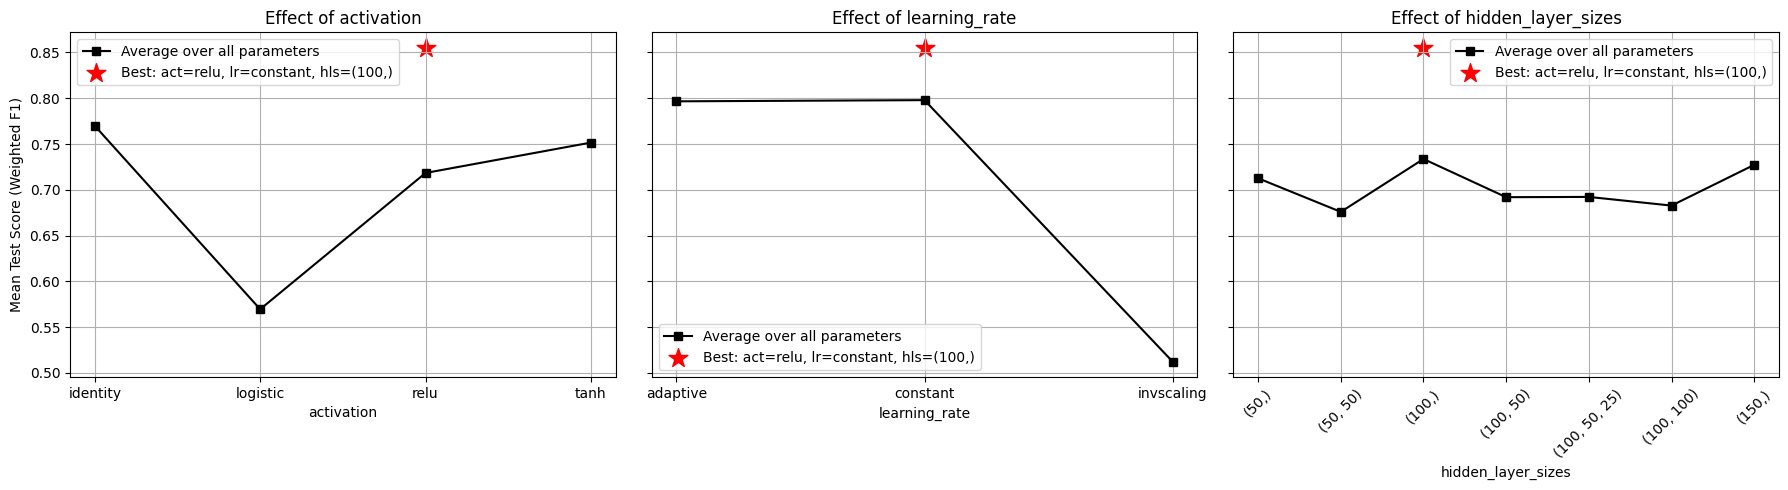

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming results and grid_search are already defined
results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_activation = best_params['activation']
best_learning_rate = best_params['learning_rate']  # Correct key from MLPClassifier
best_hidden_layer_sizes = best_params['hidden_layer_sizes']

# Create a figure with 3 subplots in a single row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: Effect of activation
mean_scores_act = results.groupby('param_activation')['mean_test_score'].mean().reset_index()
activation_order = mean_scores_act['param_activation'].tolist()  # Get unique activations
ax1.plot(range(len(activation_order)), mean_scores_act['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
best_act_index = activation_order.index(best_activation)
ax1.scatter([best_act_index], [best_score], color='red', s=200, marker='*', 
            label=f'Best: act={best_activation}, lr={best_learning_rate}, hls={best_hidden_layer_sizes}')
ax1.set_xticks(range(len(activation_order)))
ax1.set_xticklabels(activation_order)
ax1.set_xlabel('activation')
ax1.set_ylabel('Mean Test Score (Weighted F1)')
ax1.set_title('Effect of activation')
ax1.grid(True)
ax1.legend()

# Plot 2: Effect of learning_rate
mean_scores_lr = results.groupby('param_learning_rate')['mean_test_score'].mean().reset_index()  # Correct key
learning_rates = mean_scores_lr['param_learning_rate'].tolist()
ax2.plot(range(len(learning_rates)), mean_scores_lr['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
best_lr_index = learning_rates.index(best_learning_rate)
ax2.scatter([best_lr_index], [best_score], color='red', s=200, marker='*', 
            label=f'Best: act={best_activation}, lr={best_learning_rate}, hls={best_hidden_layer_sizes}')
ax2.set_xticks(range(len(learning_rates)))
ax2.set_xticklabels(learning_rates)
ax2.set_xlabel('learning_rate')
ax2.set_title('Effect of learning_rate')
ax2.grid(True)
ax2.legend()

# Plot 3: Effect of hidden_layer_sizes
mean_scores_hls = results.groupby('param_hidden_layer_sizes')['mean_test_score'].mean().reset_index()
# Convert tuples to string for plotting (or use index)
hls_labels = [str(hls) for hls in mean_scores_hls['param_hidden_layer_sizes']]
ax3.plot(range(len(hls_labels)), mean_scores_hls['mean_test_score'], 
         marker='s', linestyle='-', color='black', label='Average over all parameters')
best_hls_index = mean_scores_hls[mean_scores_hls['param_hidden_layer_sizes'] == best_hidden_layer_sizes].index[0]
ax3.scatter([best_hls_index], [best_score], color='red', s=200, marker='*', 
            label=f'Best: act={best_activation}, lr={best_learning_rate}, hls={best_hidden_layer_sizes}')
ax3.set_xticks(range(len(hls_labels)))
ax3.set_xticklabels(hls_labels, rotation=45)
ax3.set_xlabel('hidden_layer_sizes')
ax3.set_title('Effect of hidden_layer_sizes')
ax3.grid(True)
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()